In [4]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
print(np.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

1.3.0
1.15.4


In [5]:
# start of by defining number of labels we will have aka # of features
number_of_labels = 10

# define the number of neurons we will use. 1 layer 3 neurons
number_of_neurons = 3

In [6]:
# define our placeholder
# z = Wx + b
# y = Mx + b

# number of samples by the number of features
# we dont know our sample size which is why we put None
# we know our number of features though which is 10

x = tf.placeholder(tf.float32,(None,number_of_labels))

In [7]:
Weight = tf.Variable(tf.random_normal([number_of_labels, number_of_neurons]))

In [8]:
Bias = tf.Variable(tf.ones(number_of_neurons))

In [9]:
xW = tf.matmul(x, Weight)

In [10]:
z = tf.add(xW,Bias)

In [11]:
a = tf.sigmoid(z)

In [12]:
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    # result of each neuron computed
    layer_out = sess.run(a, feed_dict={x:np.random.random([1,number_of_labels])})

In [14]:
# we only ran it once so its not really a nn. We need some sort of cost function
# so that we can adjust our Weight and Bias.
print(layer_out)

[[0.892269  0.8575778 0.9064101]]


In [15]:
# SIMPLE REGRESSION EXAMPLE
# PERFORMING A LINEAR FIT

In [16]:
# add some noise
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [17]:
x_data

array([ 0.23408387,  1.16733385,  2.84323153,  2.18419812,  3.53073642,
        4.67157735,  5.55673775,  6.81475607,  8.2123665 , 11.25344575])

In [18]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [19]:
y_label

array([ 0.81119736,  1.27087491,  1.62025442,  3.93673148,  5.91030852,
        6.56042587,  6.89352983,  7.18621313,  8.30194083, 11.15389827])

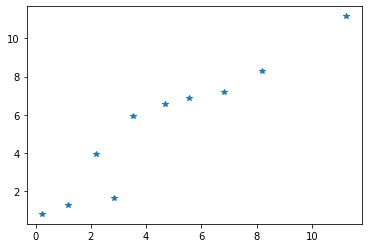

In [20]:
plt.plot(x_data,y_label, '*')

In [21]:
# we want y = mx + b

In [22]:
np.random.rand(2)

array([0.34835795, 0.02099754])

In [23]:
# here we take two random variables and in the end our nn will take care of 
# the work for us by using the cost and optimized fuction 
# here m is the slope
# b is the intercept
m = tf.Variable(0.73)
b = tf.Variable(0.88)

In [24]:
cost_function = 0

for x,y in zip(x_data, y_label):
    
    # y_hat here means our predicted value. it will probably be way off 
    # since we are using random values. thats where are cost function comes
    # into play
    y_hat = m*x + b
    
    # here we take our true y value and subtract it from our predicted y value
    # then we square it to punish higher error 
    cost_function += (y - y_label) ** 2
    
    

In [30]:
# Now we will use an optizmizer to minimize the error
# learning rate defines how fast we are going to descend down
#  too large is not good too small is gonna take forever
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)


In [31]:
# now we tell it what it is trying to minimize
train = optimizer.minimize(cost_function)

AttributeError: 'numpy.dtype' object has no attribute 'base_dtype'

In [27]:
start = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    
    sess.run(start)
    
    training_steps = 1 
    
    for i in range(training_steps):
        
        sess.run(train)
    
        final_slope, final_intercept = sess.run([m,b])



NameError: name 'train' is not defined

In [28]:
x_test = np.linspace(-1,11,10)

# Now y = mx + b

final_output = final_slope * x_test + final_intercept

plt.plot(x_test, final_output)
plt.plot(x_data,y_label, '*')

NameError: name 'final_slope' is not defined